# Introduction to intelligent Transportation Systems (MTAT.08.040) - Lab 3
Created by Maxime Moreau - contact@maxime-moreau.fr - University of Tartu 2020.

Sources:
- [Wikipedia - Histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization)
- [Maths explanation](https://www.math.uci.edu/icamp/courses/math77c/demos/hist_eq.pdf)
- [Introduction to Histogram Equalization](https://www.youtube.com/watch?v=WuVyG4pg9xQ)
- [Grayscale](https://en.wikipedia.org/wiki/Grayscale)


In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt  

## First part: Histogram equalization
This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, **the intensities can be better distributed on the histogram**. As we will see, the intensities will be better distributed (evenly speaking).


### Load the image and convert it to grayscale
First of all, we load the image and convert it to **grayscale**. We work with grayscale to have only pixels intensity information. This is an image with a 8-bit gray-scale palette, meaning that values range is [0;255] as we have 2^8 (256) possible values (`unit8` type). The shades of gray go from 0 (black, total absence of light) to 255 (white, total pesence of light).


This is also true for colored picture "nature.jpg". The image encoding is 8 bit depth (`uint8` type). If the image was 16 bit depth, then we would use 2^16 (65536) instead of 255.

Color depth, also known as bit depth, is either the number of bits used to indicate the color of a single pixel or the number of bits used for each color component of a single pixel (rgb, brg...).

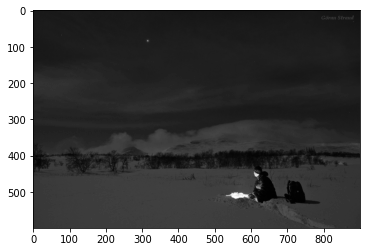

type of image_gray uint8
Min intensity: 0, max intensity: 255


In [98]:
image = cv2.imread('nature.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.show()

print(f'type of image_gray {image_gray.dtype}')
print(f'Min intensity: {image_gray.flatten().min() }, max intensity: {image_gray.flatten().max()}')

### Create histogram
We create an histogram of the gray image. An histogram is a graph that helps you to have an idea about the intensity distribution of an image. **It is a plot with pixel values and corresponding number of pixels in the image.**

#### Parameters
So, we have 256 bins because we want one bin for **each intensity value**. We can know this value thanks to the type of the grayscale image. Here the type is `unit8`, so we can have 2^8 (256) values: [0;255].


This is totally normal because grayscale is defined by 8-bit colors.

In [89]:
# find frequency of pixels in range 0-255 
hist = cv2.calcHist([image_gray], [0], None, [256], [0,256])

Then, We create the normalized CDF of the histogram.

### CDF - Cumulative Density Function
The CDF show the proportion of pixels that have an intensity that is less than or equal to a particular value.
Let says that for x=50 we have y=20.000, in this particular point that means that we have 20.000 pixels that have an intensity less or equal to 50.

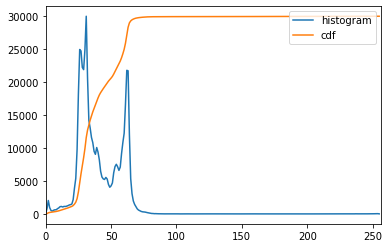

In [58]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(hist) 
plt.plot(cdf_normalized)

plt.xlim([0,256])
plt.legend(('histogram', 'cdf'), loc = 'upper right')
plt.show()

As we can see in next graph, our image has a lot of pixels with a low intensity (< ~80), which makes sens because the image is pretty dark.

### Equalize histogram - OpenCV
We use openCV method "equalizeHist" to equalize the image histogram.

This method consist of making the CDF the most linear possible as a straight line (x=y), meaning that the distribution of intensity over the whole image is **evenly distributed**, meaning that each intensity value appears in an (almost) equal numbers of pixels.

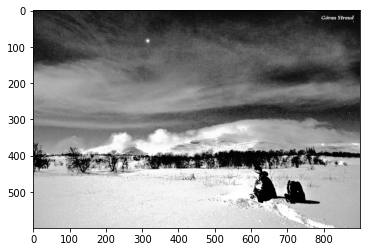

In [18]:
equ_img = cv2.equalizeHist(image_gray)
plt.imshow(equ_img, cmap="gray")

### Results
As discussed before, we can see that the CDF of the new image is almost linear (x=y).

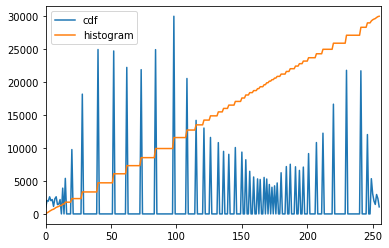

In [19]:
hist = cv2.calcHist([equ_img],[0],None,[256],[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(hist) 
plt.plot(cdf_normalized)

plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Second part: extract color histograms
The goal is to create color histograms, more exactly here we want histograms for red, green and blue. So we will use a colored image, I choose RGB but BRG could also work we would only change the indices to extract colors.

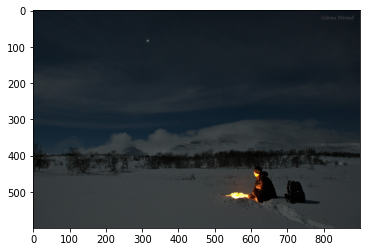

In [82]:
image_rbg = cv2.cvtColor(cv2.imread('nature.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image_rbg)

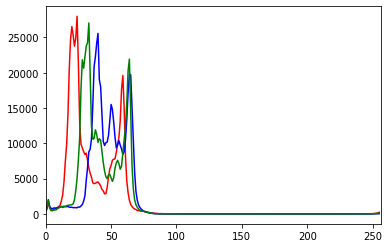

In [95]:
# Extract 2-D arrays of the RGB channels: red, green, blue
# Why 2-D? Because on (x,y) we have the color (intensity?) value.
red, green, blue = image_rbg[:,:,0], image_rbg[:,:,1], image_rbg[:,:,2]

# 256 because color depth is 8 bit. Same logic as the grayscale plot that we've disscused before.
red_hist = cv2.calcHist([red], [0], None, [256], [0,256])
blue_hist = cv2.calcHist([blue] , [0], None, [256], [0,256])
green_hist = cv2.calcHist([green], [0], None, [256], [0,256])

plt.xlim((0,256))
plt.plot(red_hist, color='red')
plt.plot(blue_hist, color='blue')
plt.plot(green_hist, color='green')

# Display the plot
plt.show()

The histogram makes sens, because we have a lot of black (0) pixels in the picture.